In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage.util import random_noise
from scipy import ndimage
import numpy as np

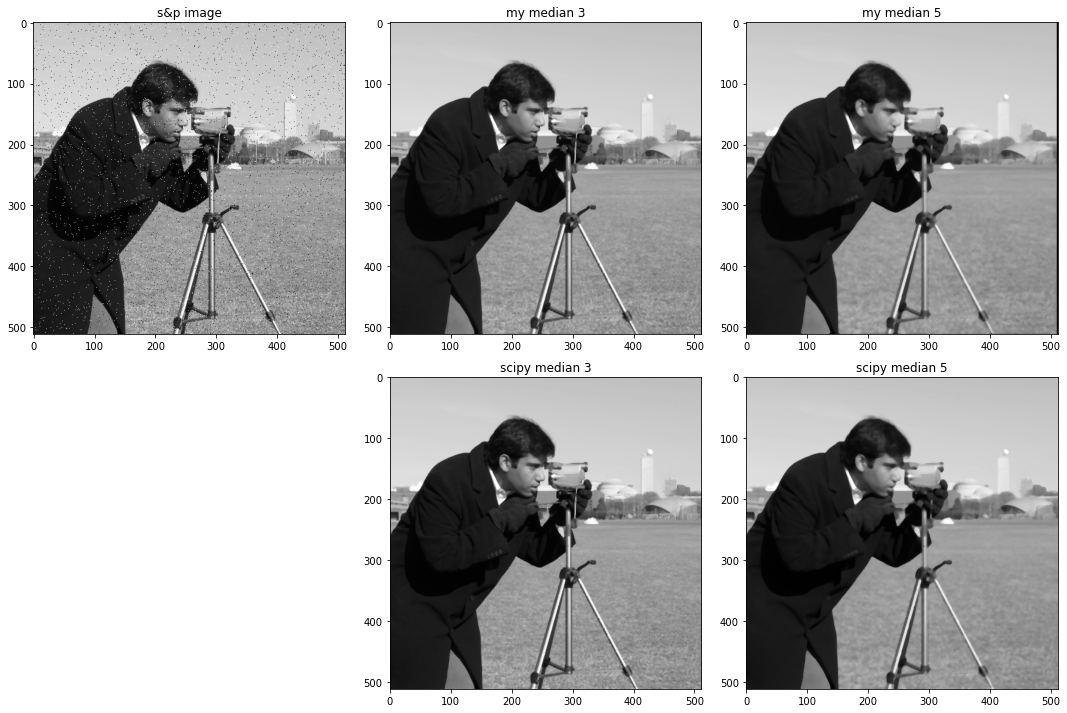

In [2]:
def my_median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


image = data.camera()
sp_image = img_as_ubyte(random_noise(image, mode="s&p", amount=0.02, salt_vs_pepper=0.5))

my_med_3 = my_median_filter(sp_image, 3)
scipy_med_3 = ndimage.median_filter(sp_image,size=3)

my_med_5 = my_median_filter(sp_image, 5)
scipy_med_5 = ndimage.median_filter(sp_image,size=5)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1), plt.imshow(sp_image, cmap="gray"), plt.title("s&p image")
plt.subplot(2,3,2), plt.imshow(my_med_3, cmap="gray"), plt.title("my median 3")
plt.subplot(2,3,5), plt.imshow(scipy_med_3, cmap="gray"), plt.title("scipy median 3")
plt.subplot(2,3,3), plt.imshow(my_med_5, cmap="gray"), plt.title("my median 5")
plt.subplot(2,3,6), plt.imshow(scipy_med_5, cmap="gray"), plt.title("scipy median 5")
plt.tight_layout()

plt.savefig('3-result.jpg')

plt.show()